In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import numpy as np
from datetime import datetime
%matplotlib inline

In [3]:
#Read the .csv file containing 5yrs worth of S&P500
df = pd.read_csv('all_stocks_5yr.csv')
sp = pd.read_csv('SP500.csv', index_col="Date", parse_dates=["Date"])

In [4]:
#Get the names of all the companies
all_company_names = []
for names in df.Name:
    if names not in all_company_names:
        all_company_names.append(names)
        
#Timestamp here
all_dates = []
for dates in df.date:
    if dates not in all_dates:
        all_dates.append(dates)

In [5]:
#Get the min, max, mean, medium of opening for each company
min_open = df.groupby('Name').open.min()
max_open = df.groupby('Name').open.max()
mean_open = df.groupby('Name').open.mean()
median_open = df.groupby('Name').open.median()

#Get the min, max, mean, medium of closing for each company
min_close = df.groupby('Name').close.min()
max_close = df.groupby('Name').close.max()
mean_close = df.groupby('Name').close.mean()
median_close = df.groupby('Name').close.median()

In [6]:
#% change per business day
close_price = df.groupby('Name').close
open_price = df.groupby('Name').open

In [7]:
df["per_change"] = (df.close - df.open) / df.open

In [32]:
sp["per_change"] = (sp.Close - sp.Open) / sp.Open
sp_percent = sp.per_change
sp_percent.index = all_dates

In [33]:
stock_per = df[df['Name'] == 'MS'].per_change
stock_per.index = all_dates

In [34]:
stock_per2 = df[df['Name'] == 'SO'].per_change
stock_per2.index = all_dates

Text(0.5,1,'MS VS SP')

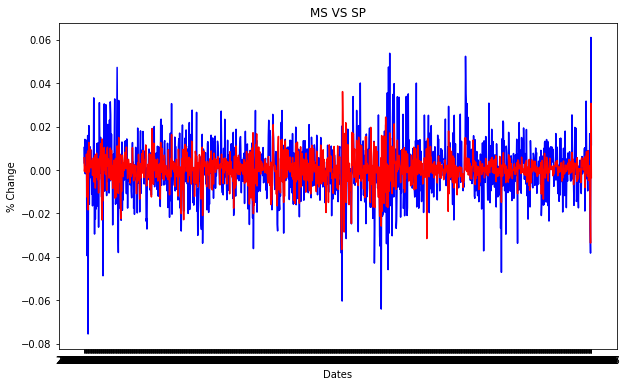

In [59]:
#MORGAN STANLEY BETA VALUE is 1.129
plt.figure(figsize = (10,6))
plt.plot(stock_per,color = 'BLUE')
plt.plot(sp_percent,color = 'RED')
plt.xlabel("Dates")
plt.ylabel("% Change")
plt.title("MS VS SP")
#As we can see, Morgan Stanley has more votility 

Text(0.5,1,'SO VS SP')

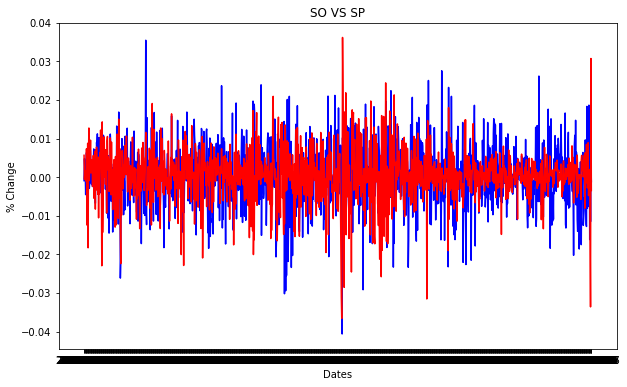

In [60]:
#SOUTHERN COMPANY BETA VALUE is .2612
plt.figure(figsize = (10,6))
plt.plot(stock_per2,color = 'BLUE')
plt.plot(sp_percent,color = 'RED')
plt.xlabel("Dates")
plt.ylabel("% Change")
plt.title("SO VS SP")
#As we can see, Southern Company has less votility, red  

In [48]:
var = np.var(sp_percent)
var

4.853478803825665e-05

In [53]:
cov_MS = np.cov(stock_per,sp_percent)[0][1]
cov_MS

5.4841674593937479e-05

In [54]:
beta_MS = cov_MS/var
beta

1.1299456907220764

In [56]:
cov_SO = np.cov(stock_per2,sp_percent)[0][1]
cov_SO

1.2681097333174612e-05

In [58]:
beta_SO = cov_SO/var
beta_SO

0.2612785147671598